# Model.saccade

In order to see the modifications of the model caused by the changes in the different parameters, feel free to play with the sliders:

## Test the parameters

-----------------------------

{'fit': array([nan, nan, nan, ..., nan, nan, nan]), 'values_fit': [{'x_0': -1.8295411371234878, 'tau': 5.034706479174819, 'T0': 0.12935967847674235, 't1': 15.999976740504406, 't2': 10.999970008917279, 'tr': 0.9235973223368934, 'x1': 0.7158262898353085, 'x2': 1.5311433026183883, 'SamplingFrequency': 1000.0, 'do_whitening': False}, {'x_0': 0.10966945146277916, 'tau': 12.643047479773816, 'T0': -6.000002438554436, 't1': 11.407515277361997, 't2': 32.05370176670675, 'tr': 1.9994025201247154, 'x1': -0.0391825305764657, 'x2': 4.999995101783609, 'SamplingFrequency': 1000.0, 'do_whitening': False}], 'FitStatistics': [{'nfev': 1450, 'chisqr': 1.7004048042456077, 'redchi': 0.054851767878890574, 'aic': -106.175116827495, 'bic': -92.86662365845783}, {'nfev': 1110, 'chisqr': 1.624834729966465, 'redchi': 0.03532249412970576, 'aic': -173.19320879190659, 'bic': -157.2813364193924}]}


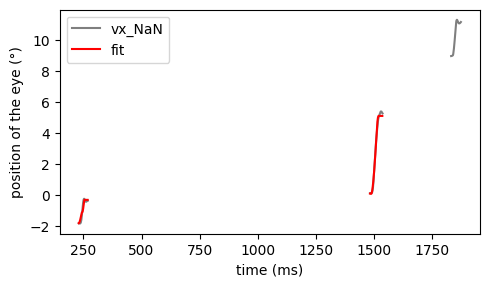

In [1]:
import ANEMO

Processing = ANEMO.ProcessingSaccades(dirpath='dataANEMO', sub='001')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'saccade_deg' # The position of the saccades in degrees
trial = 8 # Number of the trial to be transformed
expname = 'sub-001' # Name of the particular experience to be transformed
                    # or list(PreProcessing.data.keys())[0]
model = ANEMO.Model.saccade # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.saccade 
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(do_whitening=False) 
toxname = None # Name of the data to be saved
return_ = True # If True returns the value, else saves it in results and data

#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Fit = Processing.Trial.Fit(xname=xname,
                           trial=trial,
                           expname=expname,
                           model=model,
                           generate_params=generate_params,
                           stime=stime,
                           etime=etime,
                           step_fit=step_fit,
                           arg_generate_params=arg_generate_params,
                           toxname=toxname,
                           return_=return_)
print(Fit)

#------------------------------------------------------------------------------
# to retrieve the raw data:
#------------------------------------------------------------------------------
data_exp = Processing.data[expname]
data = data_exp.Data
saccade_deg = data[data.trial==trial][xname].values

#------------------------------------------------------------------------------
# Plot:
#------------------------------------------------------------------------------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(10/2, 10/(1.681*2)))

axs.plot(saccade_deg, 'k', alpha=.5, label='vx_NaN')
axs.plot(Fit['fit'], 'r', label='fit')
axs.set_xlabel('time (ms)')
axs.set_ylabel('position of the eye (°)')
axs.legend()

plt.tight_layout()
plt.show()

## Run it on a data set

----------------------------

In [2]:
import ANEMO

Processing = ANEMO.ProcessingSaccades(dirpath='dataANEMO', sub='001')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'saccade_deg' # The position of the saccades in degrees
model = ANEMO.Model.saccade # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.saccade
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(do_whitening=False) 
toxname = None # Name of the data to be saved
expnames = 'sub-001' # Name of the particular experience to be transformed
                     # or list(PreProcessing.data.keys())[0]
trials = trials = list(range(1, 16)) # List of the trial to be transformed
recalculate = False # Allows you to indicate if you want to force the
                    # calculation on the trials already processed
    
#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Processing.Data.Fit(xname=xname,
                    model=model,
                    generate_params=generate_params,
                    stime=stime,
                    etime=etime,
                    step_fit=step_fit,
                    arg_generate_params=arg_generate_params,
                    toxname=toxname,
                    expnames=expnames,
                    trials=trials,
                    recalculate=recalculate)

calculates Fit_saccade from the file sub-001... finished
save data... finished
